<a href="https://colab.research.google.com/github/pharringtonp19/mecon/blob/main/notebooks/Root_Finding_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Install**

In [76]:
%%capture 
!pip install jaxopt

### **Imports**

In [103]:
import jax 
jax.config.update("jax_enable_x64", True)
import jaxopt
import jax.numpy as jnp 
from functools import partial 
import matplotlib.pyplot as plt

### **Parameters**

In [214]:
p1 = 12. 
p2 = lambda x: jnp.maximum(12. - 0.2*x**2, .5)
m = 36. 

### **Graph**

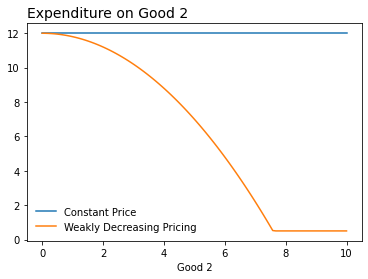

In [217]:
xs = jnp.linspace(0, 10, 100)
plt.title('Expenditure on Good 2', loc='left', size=14)
plt.plot(xs, jax.vmap(p2)(jnp.zeros_like(xs)), label='Constant Price')
plt.plot(xs, jax.vmap(p2)(xs), label='Weakly Decreasing Pricing')
plt.xlabel('Good 2')
plt.legend(frameon=False)
plt.show()

### **Constructing the Budget Constraint**

In [218]:
def Variable_Pricing_Excess_Expenditure(x2, x1): 
  return p1*x1 + p2(x2)*x2 - m 

def Constant_Pricing_Excess_Expenditure(x2, x1): 
  return p1*x1 + p2(0)*x2 - m 

def solver(F, x1):
  bisec = jaxopt.Bisection(optimality_fun=F, lower=-1., upper=1000)
  return bisec.run(x1=x1).params

def budget_contraint(F, solver, x):
  return solver(F, x)

In [224]:
for x1 in [1., 1.5, 2.]:
  a, b = jax.grad(Variable_Pricing_Excess_Expenditure, argnums=(0,1))(x1, solver(Variable_Pricing_Excess_Expenditure, x1))
  print(-a/b)

-0.9500000000000001
-0.8875000000000001
-0.7999999999999999


In [219]:
Constant_Pricing_Excess_Expenditure(1000., 0.)

DeviceArray(11964., dtype=float64, weak_type=True)

### **Plot Budget Constraint Function**

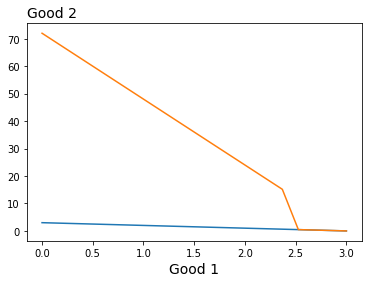

In [220]:
constant_pricing_x2s = [] 
variable_pricing_x2s = []
x1s = jnp.linspace(0, 3, 20)
for x1 in x1s:
  #print(x1, budget_contraint(Constant_Pricing_Excess_Expenditure, solver, x1))
  constant_pricing_x2s.append(budget_contraint(Constant_Pricing_Excess_Expenditure, solver, x1))
  variable_pricing_x2s.append(budget_contraint(Variable_Pricing_Excess_Expenditure, solver, x1))

plt.plot(x1s, constant_pricing_x2s, label='Constant Pricing')
plt.plot(x1s, variable_pricing_x2s, label='Variable Pricing')
plt.title('Good 2', loc='left', size=14)
plt.xlabel('Good 1', size=14)
plt.show()